In [28]:
import importlib
import numpy as np

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt

import gridify as gy
importlib.reload(gy)

import cluster_extraction as ce
importlib.reload(ce)

import dataset_generation as dg
importlib.reload(dg)



<module 'dataset_generation' from '/ssd2/hj/cluster-ambiguity/cluster-ambiguity/cambiguity/dataset_generation.py'>

In [2]:
X, y = load_digits(return_X_y=True)
X_tsne = TSNE(n_components=2).fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

/home/hj/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hj/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

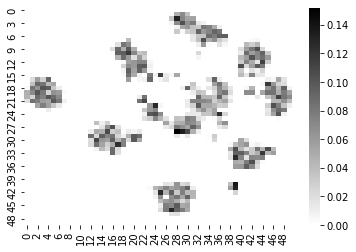

In [3]:
X_tsne_grid = gy.gridify(X_tsne, 0.2, 3, 1000, 50)
sns.heatmap(X_tsne_grid, cmap='binary')

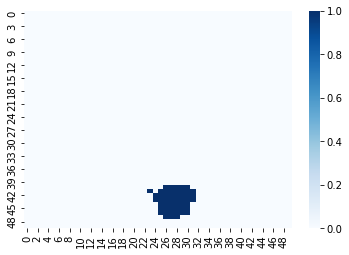

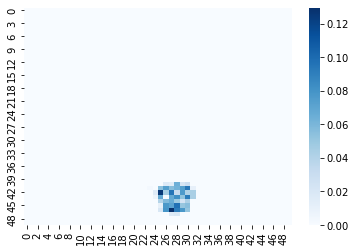

In [20]:
cluster = ce.cluster_extraction(X_tsne_grid, 0.3)
sns.heatmap(cluster, cmap='Blues')
plt.show()

cluster_grid = cluster * X_tsne_grid
sns.heatmap(cluster_grid, cmap="Blues")
plt.show()

<AxesSubplot:>

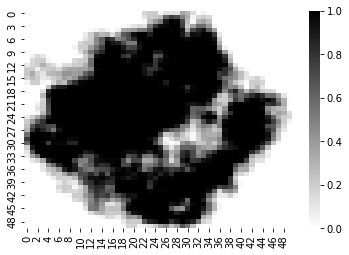

In [23]:
X_pca_grid = gy.gridify(X_pca, 0.2, 30, 1000, 50)
sns.heatmap(X_pca_grid, cmap='binary')

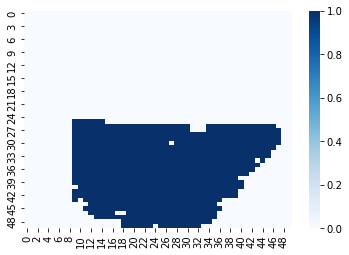

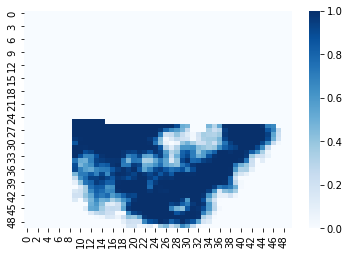

In [24]:
cluster = ce.cluster_extraction(X_pca_grid, 0.3)
sns.heatmap(cluster, cmap='Blues')
plt.show()

cluster_grid = cluster * X_pca_grid
sns.heatmap(cluster_grid, cmap="Blues")
plt.show()

In [33]:
dg.generate_random_clusters(
    data=X_tsne, 
    data_name="digitstsne",
    opacity=0.2,
    radius=3,
    pixel_size=1000,
    grid_size=50,
    walk_num_ratio=0.3,
    cluster_num=5000,
    path="random_clusters"
)

100%|██████████| 5000/5000 [00:07<00:00, 638.84it/s]
